In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [2]:
individual_stats = pd.read_csv('individual_stats.csv')
individual_stats.head()

,Date,Team,Opponent,Player,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Win
0,12/3/2020,Kaukauna,Appleton North,4.0,31.0,21.0,12.0,3.0,1.0,2.0,3.0,5.0,35.0,0.535714286,18.75,19.97142857,Yes
1,12/4/2020,Kaukauna,Oshkosh West,4.0,35.0,13.0,5.0,3.0,0.0,3.0,3.0,3.0,15.0,0.421052632,6.315789474,7.275789474,Yes
2,12/8/2020,Kaukauna,Appleton East,4.0,34.0,22.0,12.0,6.0,0.0,4.0,4.0,5.0,40.0,0.545454545,21.81818182,24.30545455,Yes
3,12/11/2020,Kaukauna,Hortonville,4.0,44.0,7.0,2.0,6.0,2.0,5.0,7.0,5.0,6.0,0.5,3,5.28,Yes
4,12/12/2020,Kaukauna,De Pere,4.0,36.0,14.0,6.0,5.0,0.0,1.0,1.0,1.0,20.0,0.55,11,13.09,No


In [3]:
individual_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   222 non-null    object 
 1   Team                   222 non-null    object 
 2   Opponent               222 non-null    object 
 3   Player                 222 non-null    float64
 4   Minutes                222 non-null    float64
 5   FieldGoalAttempts      222 non-null    float64
 6   FieldGoalMade          222 non-null    float64
 7   Assits                 222 non-null    float64
 8   OffensiveRebounds      222 non-null    float64
 9   DefensiveRebounds      222 non-null    float64
 10  TotalRebounds          222 non-null    float64
 11  Turnovers              222 non-null    float64
 12  Points                 222 non-null    float64
 13  OffensiveEfficiency    222 non-null    object 
 14  EfficientPointsScored  222 non-null    object 
 15  RawEOP

In [5]:
# Replace #DIV/0! with 0s
individual_stats = individual_stats.replace('#DIV/0!', 0)
individual_stats[['OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP']] = individual_stats[['OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP']].apply(pd.to_numeric) 
individual_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   222 non-null    object 
 1   Team                   222 non-null    object 
 2   Opponent               222 non-null    object 
 3   Player                 222 non-null    float64
 4   Minutes                222 non-null    float64
 5   FieldGoalAttempts      222 non-null    float64
 6   FieldGoalMade          222 non-null    float64
 7   Assits                 222 non-null    float64
 8   OffensiveRebounds      222 non-null    float64
 9   DefensiveRebounds      222 non-null    float64
 10  TotalRebounds          222 non-null    float64
 11  Turnovers              222 non-null    float64
 12  Points                 222 non-null    float64
 13  OffensiveEfficiency    222 non-null    float64
 14  EfficientPointsScored  222 non-null    float64
 15  RawEOP

In [6]:
# Make numeric data frame
individual_num = individual_stats.drop(columns = ['Team', 'Opponent'])
dummy = pd.get_dummies(individual_num['Win'])
individual_num = pd.concat([individual_num, dummy], axis = 1)
individual_num = individual_num.drop(columns = ['Win', 'Ue'])
individual_num = individual_num.rename(columns = {'Yes' : "Win", 'No' : "Loss"})
individual_num = individual_num[individual_num['Minutes'] >=4]
individual_num = individual_num[individual_num['OffensiveEfficiency'] < 1]
individual_num

,Date,Player,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,4.0,31.0,21.0,12.0,3.0,1.0,2.0,3.0,5.0,35.0,0.535714,18.750000,19.971429,0,1
1,12/4/2020,4.0,35.0,13.0,5.0,3.0,0.0,3.0,3.0,3.0,15.0,0.421053,6.315789,7.275789,0,1
2,12/8/2020,4.0,34.0,22.0,12.0,6.0,0.0,4.0,4.0,5.0,40.0,0.545455,21.818182,24.305455,0,1
3,12/11/2020,4.0,44.0,7.0,2.0,6.0,2.0,5.0,7.0,5.0,6.0,0.500000,3.000000,5.280000,0,1
4,12/12/2020,4.0,36.0,14.0,6.0,5.0,0.0,1.0,1.0,1.0,20.0,0.550000,11.000000,13.090000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2/11/2021,4.0,40.0,18.0,6.0,13.0,1.0,4.0,5.0,4.0,23.0,0.553571,12.732143,18.201429,1,0
216,2/11/2021,11.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.000000,0.000000,1,0
218,2/11/2021,15.0,11.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.083333,0.000000,0.000000,1,0
219,2/11/2021,20.0,31.0,6.0,3.0,2.0,0.0,2.0,2.0,2.0,9.0,0.228571,2.057143,2.404571,1,0


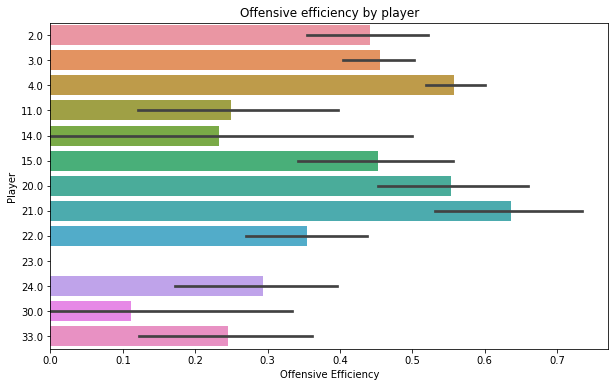

In [7]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="OffensiveEfficiency", y="Player", data=individual_num, orient = 'h')
plt.xlabel("Offensive Efficiency")
plt.ylabel("Player")
plt.title("Offensive efficiency by player");

Text(0.5, 1.0, 'Offensive efficiency v. Raw efficient offensive production')

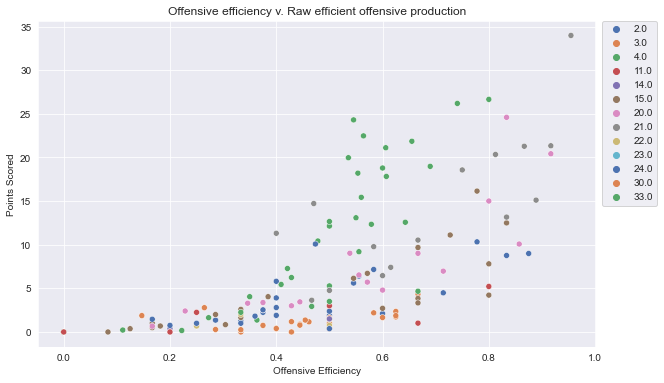

In [8]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="RawEOP", 
                hue="Player",
                data=individual_num, palette = "deep")
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
#place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Offensive efficiency v. Raw efficient offensive production")

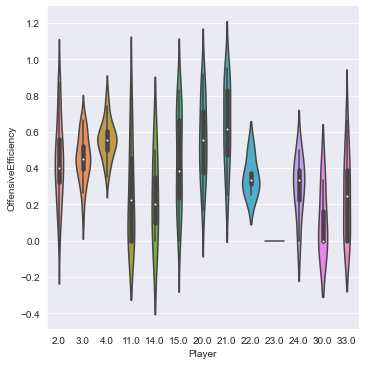

In [9]:
sns.catplot(x = "Player", y = "OffensiveEfficiency", data = individual_num, kind = 'violin');

In [10]:
individual_corr = individual_num.drop(columns = 'Player')
correlations = individual_corr.corr()
correlations

,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
Minutes,1.000000,0.723059,0.666244,0.540137,0.298132,0.496283,0.488204,0.470416,0.619494,0.500396,0.547200,0.560610,0.007535,0.000185
FieldGoalAttempts,0.723059,1.000000,0.877421,0.658926,0.263594,0.369322,0.379029,0.352879,0.830530,0.497911,0.757283,0.765161,-0.001985,0.015622
FieldGoalMade,0.666244,0.877421,1.000000,0.564682,0.357252,0.462857,0.485155,0.360768,0.902117,0.628416,0.888597,0.873546,-0.092860,0.105301
Assits,0.540137,0.658926,0.564682,1.000000,0.175061,0.269017,0.269705,0.411578,0.663595,0.447318,0.645160,0.730924,-0.052121,0.051651
OffensiveRebounds,0.298132,0.263594,0.357252,0.175061,1.000000,0.498402,0.754192,0.201853,0.272061,0.466742,0.404002,0.398454,-0.067738,0.075395
DefensiveRebounds,0.496283,0.369322,0.462857,0.269017,0.498402,1.000000,0.945174,0.335695,0.445251,0.385361,0.465796,0.453930,-0.171514,0.182487
TotalRebounds,0.488204,0.379029,0.485155,0.269705,0.754192,0.945174,1.000000,0.330302,0.439730,0.467701,0.504991,0.493913,-0.155427,0.166622
Turnovers,0.470416,0.352879,0.360768,0.411578,0.201853,0.335695,0.330302,1.000000,0.356418,0.103136,0.268737,0.290493,-0.092309,0.102292
Points,0.619494,0.830530,0.902117,0.663595,0.272061,0.445251,0.439730,0.356418,1.000000,0.544669,0.943927,0.935291,-0.085628,0.096863
OffensiveEfficiency,0.500396,0.497911,0.628416,0.447318,0.466742,0.385361,0.467701,0.103136,0.544669,1.000000,0.677816,0.679790,-0.146065,0.134889


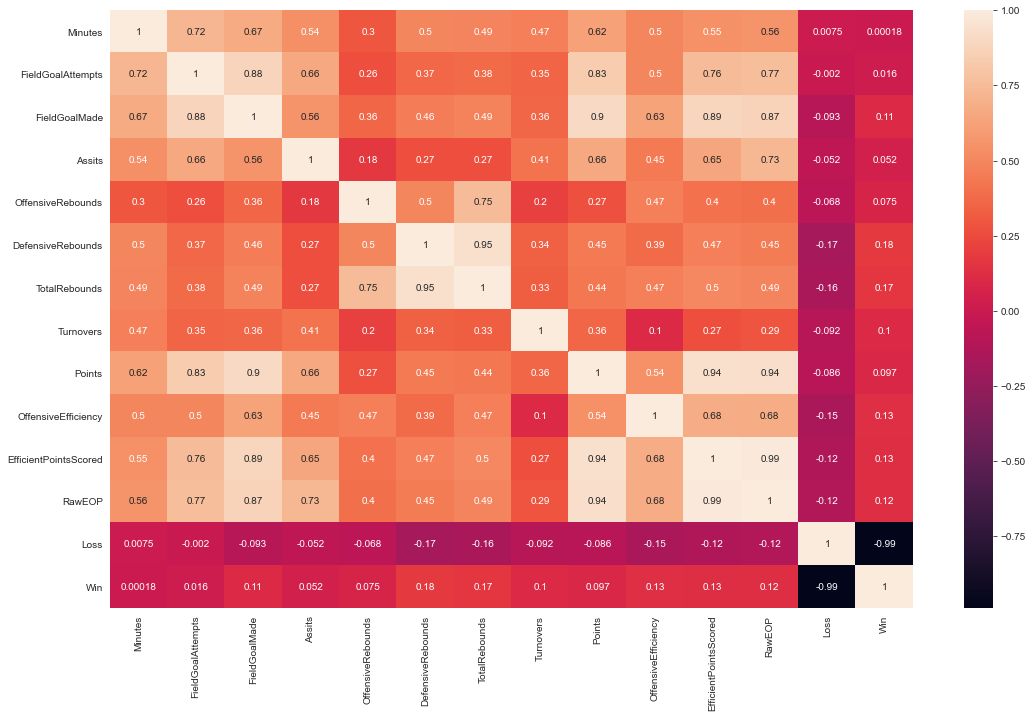

In [11]:
plt.figure(figsize=(18,11))
sns.heatmap(correlations, annot = True);

In [23]:
#For player number 4
player_4 = individual_stats[individual_stats.Player == 4]
player_4_num = player_4.drop(columns = ['Date', 'Team', 'Opponent', 'Player'])
dummy = pd.get_dummies(player_4_num['Win'])
player_4_num = pd.concat([player_4_num, dummy], axis = 1)

,Minutes,FieldGoalAttempts,FieldGoalMade,Assits,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Turnovers,Points,OffensiveEfficiency,EfficientPointsScored,RawEOP,Win,No,Yes
0,31.0,21.0,12.0,3.0,1.0,2.0,3.0,5.0,35.0,0.535714,18.750000,19.971429,Yes,0,1
1,35.0,13.0,5.0,3.0,0.0,3.0,3.0,3.0,15.0,0.421053,6.315789,7.275789,Yes,0,1
2,34.0,22.0,12.0,6.0,0.0,4.0,4.0,5.0,40.0,0.545455,21.818182,24.305455,Yes,0,1
3,44.0,7.0,2.0,6.0,2.0,5.0,7.0,5.0,6.0,0.500000,3.000000,5.280000,Yes,0,1
4,36.0,14.0,6.0,5.0,0.0,1.0,1.0,1.0,20.0,0.550000,11.000000,13.090000,No,1,0
5,32.0,16.0,7.0,3.0,0.0,4.0,4.0,1.0,22.0,0.500000,11.000000,12.140000,No,1,0
6,36.0,17.0,8.0,7.0,1.0,4.0,5.0,2.0,26.0,0.600000,15.600000,18.792000,No,1,0
7,36.0,22.0,11.0,9.0,1.0,7.0,8.0,3.0,28.0,0.606061,16.969697,21.115152,No,1,0
8,34.0,6.0,1.0,6.0,0.0,1.0,1.0,8.0,7.0,0.350000,2.450000,4.046000,No,1,0
9,34.0,12.0,6.0,11.0,0.0,1.0,1.0,5.0,21.0,0.607143,12.750000,17.825714,Yes,0,1


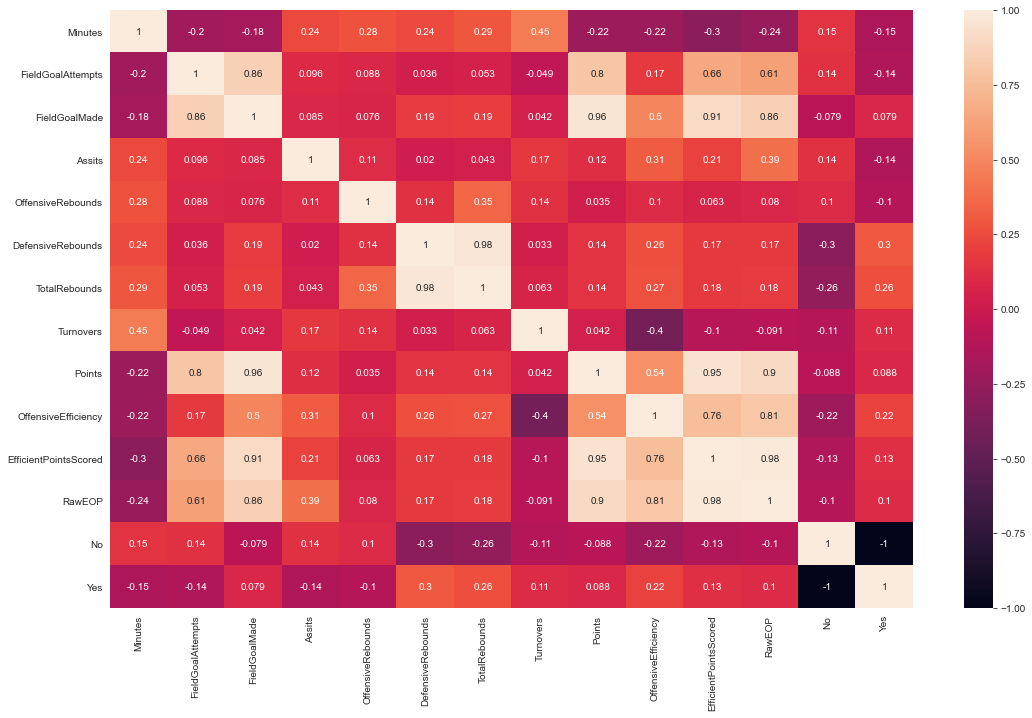

In [25]:
plt.figure(figsize=(18,11))
sns.heatmap(player_4_num.corr(), annot = True);